In [9]:
# Day 1-2: Setup folders
# -------------------------

import os
import pandas as pd
import matplotlib.pyplot as plt

folders = ['data', 'visuals', 'reports']
for folder in folders:
    os.makedirs(folder, exist_ok=True)

print("Folders ready:", folders)

Folders ready: ['data', 'visuals', 'reports']


In [10]:
# Day 3: Load & Clean Data
# -------------------------

try:
    df = pd.read_csv('sales_data.csv')
except FileNotFoundError:
    print("Error: sales_data.csv not found in data/ folder")
    exit()


print("First 5 rows:\n", df.head())
print("\nData Info:\n", df.info())
print("\nSummary statistics:\n", df.describe())

# Clean data
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
print("\nData shape after cleaning:", df.shape)


if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

First 5 rows:
          Date     Product  Quantity  Price Customer_ID Region  Total_Sales
0  2024-01-01       Phone         7  37300     CUST001   East       261100
1  2024-01-02  Headphones         4  15406     CUST002  North        61624
2  2024-01-03       Phone         2  21746     CUST003   West        43492
3  2024-01-04  Headphones         1  30895     CUST004   East        30895
4  2024-01-05      Laptop         8  39835     CUST005  North       318680
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         100 non-null    object
 1   Product      100 non-null    object
 2   Quantity     100 non-null    int64 
 3   Price        100 non-null    int64 
 4   Customer_ID  100 non-null    object
 5   Region       100 non-null    object
 6   Total_Sales  100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB

Data Info:
 

In [11]:
# Day 4: Analysis
# -------------------------
total_sales = df['Total_Sales'].sum()
best_product = df.groupby('Product')['Total_Sales'].sum().idxmax()
avg_sales = df.groupby('Product')['Total_Sales'].mean()
top3_products = df.groupby('Product')['Total_Sales'].sum().sort_values(ascending=False).head(3)

print("\nTotal Sales:", total_sales)
print("Best Selling Product:", best_product)
print("Average Sales per Product:\n", avg_sales)
print("Top 3 Products:\n", top3_products)



Total Sales: 12365048
Best Selling Product: Laptop
Average Sales per Product:
 Product
Headphones     92268.866667
Laptop        162050.416667
Monitor        89871.400000
Phone         142969.700000
Tablet        110936.153846
Name: Total_Sales, dtype: float64
Top 3 Products:
 Product
Laptop    3889210
Tablet    2884340
Phone     2859394
Name: Total_Sales, dtype: int64


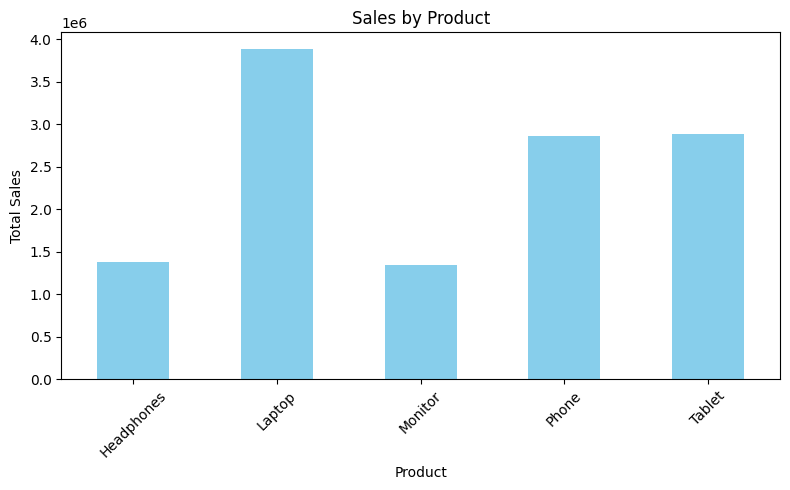

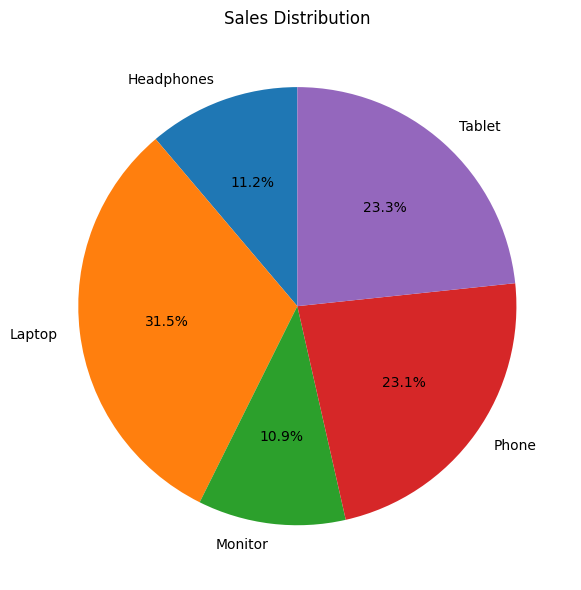

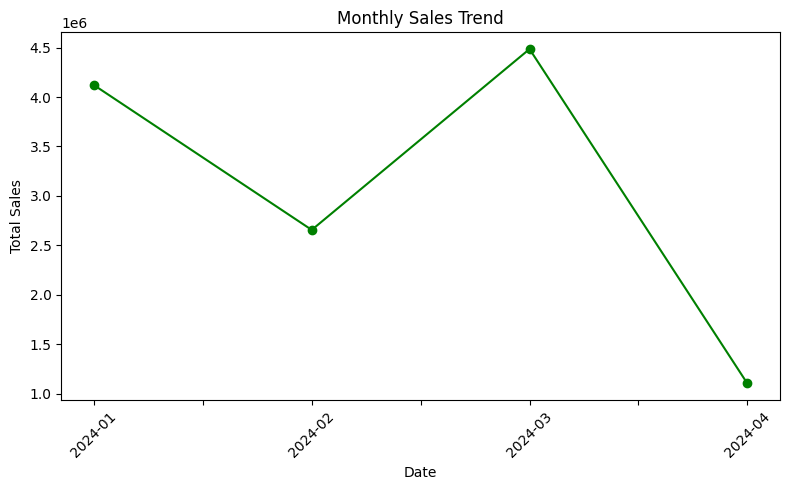

In [12]:
# Day 5: Visualizations
# -------------------------
#  Bar chart: Sales by Product
sales_by_product = df.groupby('Product')['Total_Sales'].sum()
plt.figure(figsize=(8,5))
sales_by_product.plot(kind='bar', color='skyblue', title='Sales by Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visuals/sales_by_product.png')
plt.show()

#  Pie chart: Sales Distribution
plt.figure(figsize=(6,6))
sales_by_product.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Sales Distribution')
plt.ylabel('')
plt.tight_layout()
plt.savefig('visuals/sales_distribution.png')
plt.show()

#  Line chart: Monthly Sales Trend
if 'Date' in df.columns:
    monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Total_Sales'].sum()
    monthly_sales.index = monthly_sales.index.astype(str)  # make x-axis readable
    plt.figure(figsize=(8,5))
    monthly_sales.plot(kind='line', marker='o', color='green', title='Monthly Sales Trend')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('visuals/monthly_sales_trend.png')
    plt.show()
